In [101]:
import numpy as np
from sklearn.linear_model import ElasticNet, enet_path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
SEED = 11235813
import matplotlib.pyplot as plt
np.random.seed(SEED)

In [80]:
n = 50
x_true = np.array([3]*15 + [0]*25)
sigma = 1
w = np.random.rand(50)
z1, z2, z3 = np.random.rand(n), np.random.rand(n), np.random.rand(n)
Z1 = np.tile(z1.reshape(n, -1), 5)
Z2 = np.tile(z2.reshape(n, -1), 5)
Z3 = np.tile(z2.reshape(n, -1), 5)
W1, W2, W3 = np.random.rand(n, 5), np.random.rand(n, 5), np.random.rand(n, 5)
W = np.random.rand(n, 25)

In [81]:
A = np.concatenate((Z1 + .01 * W1, Z2 + .01 * W2, Z3 + .01 * W3, W ),
                   axis=1)
b = A @ x_true + sigma * w
print(b)

alpha = np.array([0.01 * 1.58 ** l for l in range(1,11)])
lambda_ = np.array([0.01 * 2 ** l for l in range(1,16)])

[11.78248537 43.75684439 12.93738195 20.39327995 22.78085621  8.86003412
 22.89625704 33.67475015 29.55417293 12.22437057 28.52335864 24.9822429
 21.25908883 14.34779082 15.22834097 16.32725228 29.01413492  5.55920528
 27.32400142 33.40362238 40.59573716 41.6692861  28.87018912 33.74410824
 21.70203719 43.30140454 15.95282028 14.90663024 32.17004942 20.39339354
 39.1315602  42.77225368 37.11668807 25.92230144 33.25166325 28.35588853
 18.06032245 16.20183741 19.86175414 36.07008368 32.16148518 16.70682971
 32.49845726 20.94428341 14.63405912 28.43715164 21.6048196  42.66000663
 17.07150782 33.07621898]


In [82]:
comb = [(alpha[i], lambda_[j]) for i in range(len(alpha)) for j in range(len(lambda_))]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=.3, random_state=SEED)

scores = []
a_sk = np.linspace(0.01, 1, 50)
b_sk = np.linspace(0.01, 1, 50)
comb_sk = [(a_sk[i], b_sk[j]) for i in range(len(a_sk)) for j in range(len(b_sk))]

for alph, lambd in comb_sk:
    eNet = ElasticNet(alpha=alph, l1_ratio=lambd, max_iter=10000, random_state=SEED)
    eNet.fit(X_train, y_train)
    scores.append(eNet.score(X_test, y_test))
    
print(scores)

[0.9904619281134893, 0.9908288803407037, 0.9911964332314743, 0.9915648513911314, 0.9919331957692998, 0.9923013050963915, 0.9926686368371467, 0.9930346422150481, 0.9933597930856211, 0.9936834951655049, 0.9940084802701306, 0.9943009673492631, 0.9945526592374484, 0.9948036933426581, 0.995053489090442, 0.995301639823462, 0.9955478305769762, 0.9957914248642358, 0.9960316265482657, 0.9962687916962589, 0.9964748766796773, 0.9966747834108288, 0.996863960883202, 0.997040528651023, 0.9972143601833482, 0.9973846226102999, 0.9975510099960959, 0.9976906061547747, 0.9978153233785597, 0.9979391722949496, 0.9980593600610317, 0.9981715397352349, 0.9982702940291169, 0.9983654493584839, 0.99844854045164, 0.9985194279523424, 0.9985792700667013, 0.9986260308081882, 0.9986713848523211, 0.99871524725881, 0.9987577081330449, 0.9987983075351669, 0.9988374089087623, 0.9988741689298263, 0.9989086631959491, 0.998934716060676, 0.9989579965157525, 0.9989785658060509, 0.998998638142201, 0.9989559632177091, 0.9854136

In [117]:
alph_best, lambd_best = comb_sk[np.argmax(scores)]
print(alph_best, lambd_best)

0.030204081632653063 0.9797959183673469


## Make enet !!!!

In [118]:
eNet = ElasticNet(alpha=alph_best, l1_ratio=lambd_best, max_iter=10000, random_state=SEED)
eNet.fit(X_train, y_train)
print(eNet.score(X_test, y_test))

0.9991252102179057


In [122]:
alphas_enet

array([17.04286571, 15.8942336 , 14.82301545, 13.82399382, 12.89230291,
       12.02340484, 11.2130676 , 10.45734437,  9.75255436,  9.09526483,
        8.48227443,  7.91059752,  7.37744972,  6.8802343 ,  6.41652954,
        5.98407692,  5.58077017,  5.20464493,  4.85386928,  4.52673474,
        4.22164797,  3.93712303,  3.67177411,  3.42430882,  3.19352187,
        2.97828918,  2.77756246,  2.59036405,  2.41578218,  2.25296655,
        2.10112414,  1.95951541,  1.82745063,  1.70428657,  1.58942336,
        1.48230155,  1.38239938,  1.28923029,  1.20234048,  1.12130676,
        1.04573444,  0.97525544,  0.90952648,  0.84822744,  0.79105975,
        0.73774497,  0.68802343,  0.64165295,  0.59840769,  0.55807702,
        0.52046449,  0.48538693,  0.45267347,  0.4221648 ,  0.3937123 ,
        0.36717741,  0.34243088,  0.31935219,  0.29782892,  0.27775625,
        0.2590364 ,  0.24157822,  0.22529665,  0.21011241,  0.19595154,
        0.18274506,  0.17042866,  0.15894234,  0.14823015,  0.13

ValueError: x and y must have same first dimension, but have shapes (100,) and (40, 100)

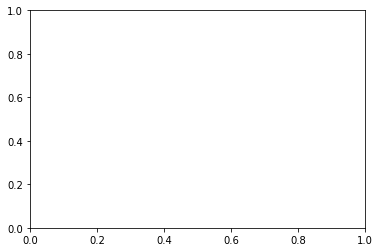

In [121]:
alphas_enet, coefs_enet, _ = enet_path(
    A, b, alpha=alph_best, l1_ratio=lambd_best, fit_intercept=False)
neg_log_alphas_enet = -np.log10(alphas_enet)
plt.figure()
for coef in coefs_enet:
    plt.plot(neg_log_alphas_enet, coefs_enet, linestyle='--')